# Importing Libraries

In [ ]:
#Install & Import Required Libraries
!pip install yfinance plotly mplfinance --quiet

import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [2]:
# Set some display options
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)

# Problem 1:

##  1. Obtaining Data

In [ ]:
# Download Stock Data

def download_flat_yf(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, progress=False)
    data = data.xs(ticker, axis=1, level=1)
    data.columns.name = None
    return data


stock_symbol = 'TCS.NS'

data = download_flat_yf(stock_symbol, start='2023-01-01', end='2023-12-31')
data.head()

YF.download() has changed argument auto_adjust default to True


,Close,High,Low,Open,Volume
Date,,,,,
2023-01-02,3104.458740,3109.598948,3079.472295,3104.030448,709547
2023-01-03,3151.957275,3160.190812,3089.086565,3095.464012,1245178
2023-01-04,3155.098145,3167.187012,3128.017641,3147.530867,1231668
2023-01-05,3151.718994,3176.657800,3123.972001,3169.899469,1826057
2023-01-06,3056.960938,3142.628755,3045.966854,3141.153319,2488376


This shows there are no null values

In [4]:
data.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

This converts the index to datetime

In [5]:
data.index=pd.to_datetime(data.index)

Description of the data

In [6]:
data.describe()

,Close,High,Low,Open,Volume
count,245.000000,245.000000,245.000000,245.000000,2.450000e+02
mean,3309.535302,3334.068858,3283.155510,3308.673557,1.933396e+06
std,169.258677,170.604005,166.127909,165.928961,9.985615e+05
min,3000.453613,3023.178440,2981.661698,3000.842075,7.095470e+05
25%,3168.471924,3190.851679,3145.542594,3169.821566,1.338557e+06
50%,3310.005859,3334.867381,3286.742683,3315.655916,1.688475e+06
75%,3417.549561,3440.776231,3389.300476,3413.579124,2.112352e+06
max,3797.104492,3863.979160,3766.764928,3794.252576,8.531230e+06


## 2. Visual Insight

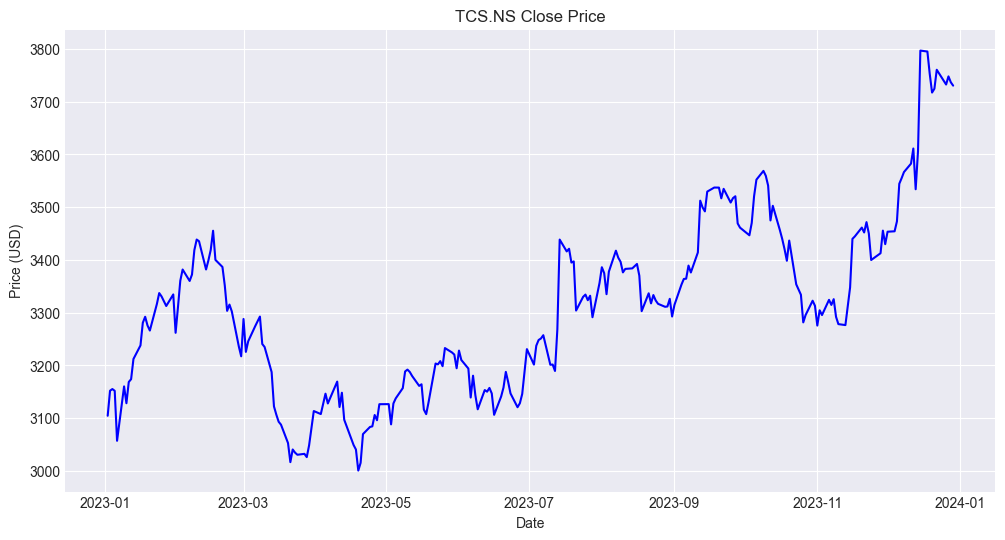

In [7]:
# Displaying each trading day's closing price
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue')
plt.title(f'{stock_symbol} Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

Candle Stick chart for the data

In [ ]:
#Displaying each day's Candlestick chart
fig = go.Figure(data=[
    go.Candlestick(x=data.index,
                   open=data['Open'],
                   high=data['High'],
                   low=data['Low'],
                   close=data['Close'])
              ])
fig.update_layout(title=f"Candlestick Chart - {stock_symbol}", xaxis_title='Date', yaxis_title='Price')
fig.show()

<b>Pattern 1: Ascending Triangle Pattern</b><br>
The ascending triangle is a bullish continuation chart pattern that forms during an uptrend as a consolidation period before further gains. It is characterised by horizontal resistance. and rising support that converges to form a triangular shape.<br>

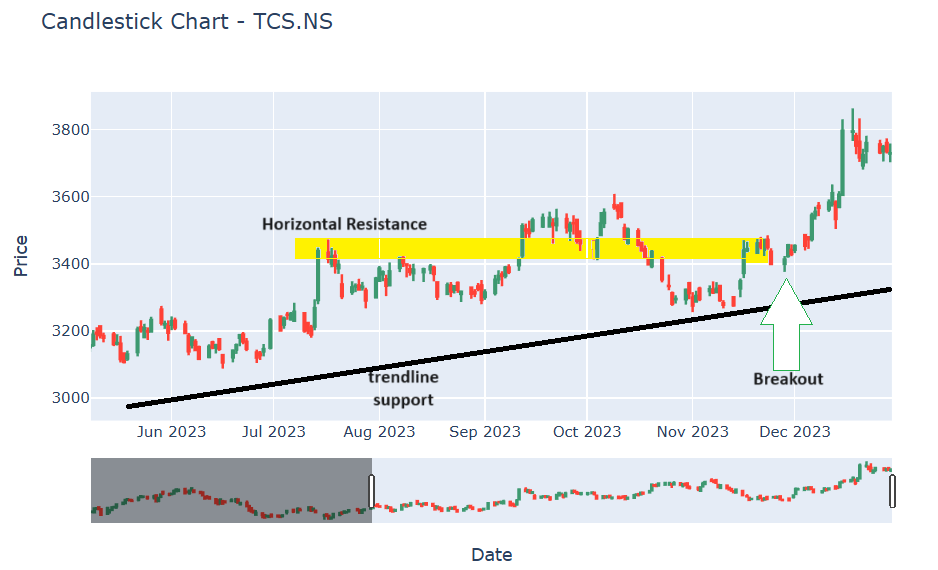



<b> Pattern 2: Bearish Maribozu</b><br>
Bearish Marubozu indicates extreme bearishness. Here the open is equal to the high and close the is equal to low. Open = High, and Close = Low.
It indicates that there is a lot of selling pressure in the stock.It does not matter what the prior trend has been, the action on the marubozu day suggests that the sentiment has changed and the stock is now bearish. This can be seen a little later in the graph.
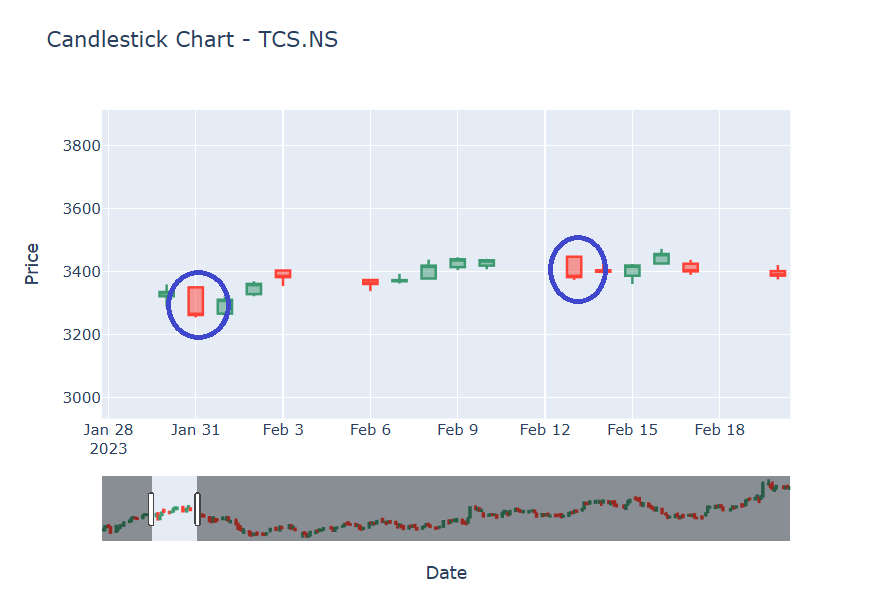



# Problem 2:

## 1. Return Computation
Both simple and log returns measure the rate of change of a price over time.
- **Simple Return**: $ (P_t - P_{t-1}) / P_{t-1} $
- **Log Return**: $ log(P_t / P_{t-1}) $

### Why Do They Look Similar?

When price changes are small, the differences between simple and log returns is very less. For example, on 2023-01-03

returns=0.015300

log returns=0.015184

### When Might They Differ Significantly?

The difference between simple and log returns becomes more when you have large price movements or looking over large periods of time.

Log Returns compound over time. For example, if the price moves from 100 to 120, the simple return is 20% while the log return is $ln(1.2) =18.2% $


In [9]:
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change() # Returns 0.01 for 1% change

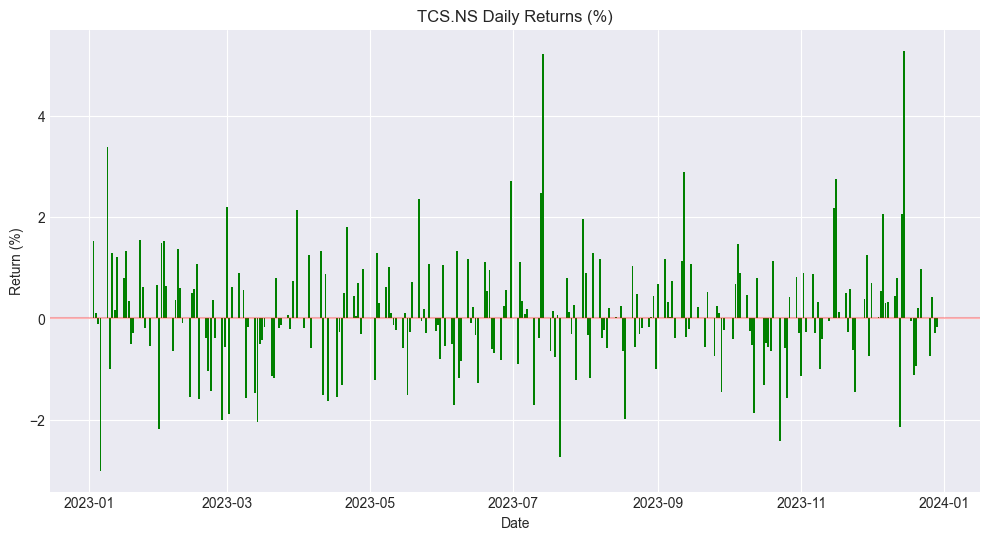

In [10]:
# Visualize daily returns
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Daily Return']*100, color='green')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title(f'{stock_symbol} Daily Returns (%)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()

In [11]:
data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))
data[['Daily Return', 'Log Return']].dropna().head()

,Daily Return,Log Return
Date,,
2023-01-03,0.015300,0.015184
2023-01-04,0.000996,0.000996
2023-01-05,-0.001071,-0.001072
2023-01-06,-0.030066,-0.030527
2023-01-09,0.033753,0.033196


In [12]:
data['Difference in Returns']=data['Daily Return']-data['Log Return']
data[['Daily Return', 'Log Return', 'Difference in Returns']].dropna().head()

,Daily Return,Log Return,Difference in Returns
Date,,,
2023-01-03,0.015300,0.015184,1.158662e-04
2023-01-04,0.000996,0.000996,4.961587e-07
2023-01-05,-0.001071,-0.001072,5.739440e-07
2023-01-06,-0.030066,-0.030527,4.612360e-04
2023-01-09,0.033753,0.033196,5.571336e-04


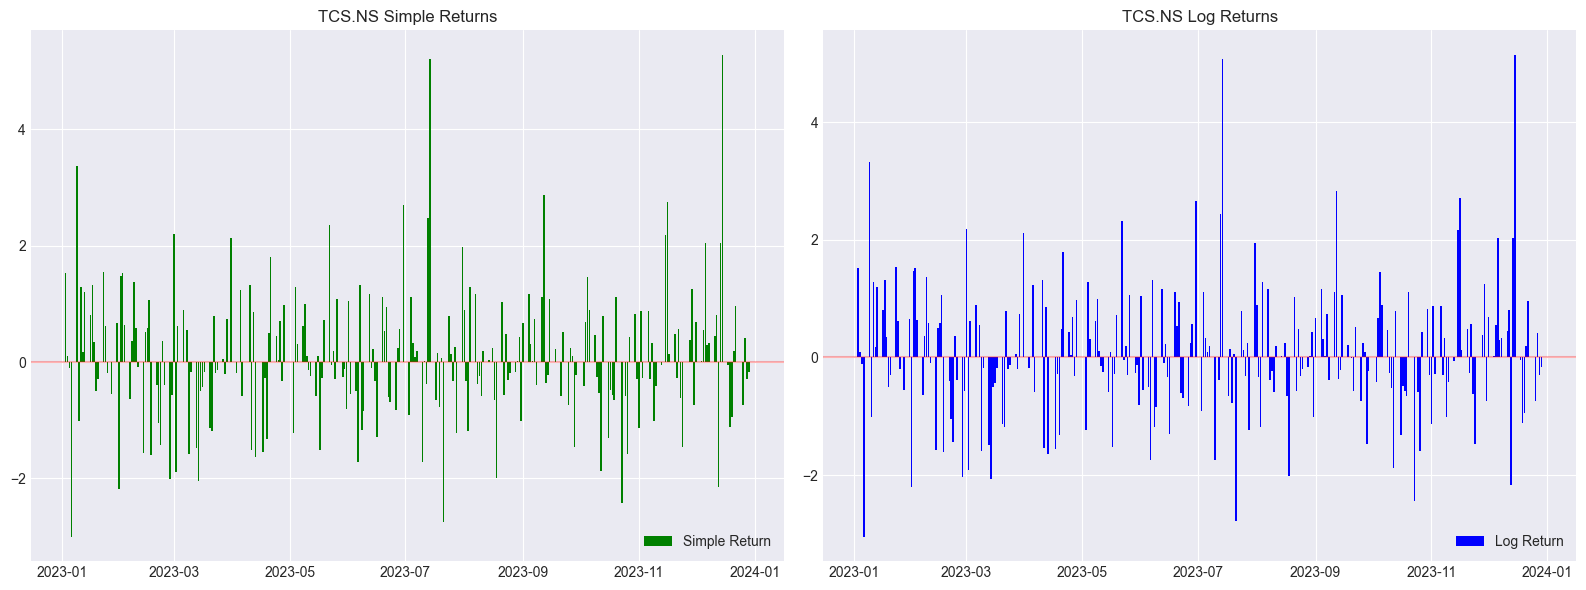

In [34]:
plt.figure(figsize=(16, 6))

# plot 1: Simple Return
plt.subplot(1, 2, 1)
plt.bar(data.index, data['Daily Return']*100, color='green', label='Simple Return')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title(f'{stock_symbol} Simple Returns')
plt.legend()

# plot 2: Log Return
plt.subplot(1, 2, 2)
plt.bar(data.index, data['Log Return']*100, color='blue', label='Log Return')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title(f'{stock_symbol} Log Returns')
plt.legend()

plt.tight_layout()
plt.show()

# PLot of Simple and Log Returns using Plotly
fig1 = px.line(data, x=data.index, y='Daily Return', title=f'{stock_symbol} Simple Returns')
fig1.show()

fig2 = px.line(data, x=data.index, y='Log Return', title=f'{stock_symbol} Log Returns')
fig2.show()

In [ ]:
# Plot of the difference between Simple and Log Returns
fig3 = px.line(data, x=data.index, y='Difference in Returns', title=f'{stock_symbol}')
fig3.show()

### Volatility Estimation
 Compute rolling 14-day volatility (standard deviation of daily returns).

In [15]:
data['Rolling Std Dev'] = data['Daily Return'].rolling(window=14).std()
trace1 = go.Scatter(
    x=data.index,
    y=data['Rolling Std Dev'],
    name='Rolling 14-Day Standard Deviation',
    line=dict(color='rgb(34,163,192)')
)

trace2 = go.Scatter(
    x=data.index,
    y=data['Close'],
    name='Closing Price',
    line=dict(color='rgb(255,100,100)')
)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(trace1, secondary_y=False)
fig.add_trace(trace2, secondary_y=True)

fig.update_layout(
    height=600,
    width=1600,
    title='Rolling 14-Day Std Dev vs Closing Price',
    xaxis=dict(tickangle=-90)
)

fig.show()


In [16]:
data['Rolling Std Dev'] = data['Daily Return'].rolling(window=14).std()
fig = px.line(data, x=data.index, y='Rolling Std Dev', title='Rolling 14-Day Standard Deviation')
fig=px.line(data,x=data.index, y=data['Close'],title='Closing Price' )
fig.show()

# Problem 3:

 • “UP” if daily return > 0%

 • “DOWN”if daily return ≤ 0%

In [17]:
from scipy.stats import binom

In [18]:
data["Daily Return"]>0

Date
2023-01-02    False
2023-01-03     True
2023-01-04     True
2023-01-05    False
2023-01-06    False
              ...  
2023-12-22     True
2023-12-26    False
2023-12-27     True
2023-12-28    False
2023-12-29    False
Name: Daily Return, Length: 245, dtype: bool

In [19]:
data['Direction']=np.where(data["Daily Return"]>0, 'UP', 'DOWN')

P(UP) = Up days / Total days

In [20]:
P_UP=data['Direction'].value_counts()['UP']/len(data)
print("P(UP) = ",P_UP)

P(UP) =  0.5142857142857142


## Part 1: If your P(UP) = 0.6, calculate:


 • Probability of exactly 6 up days in 10 days<br>
 • Probability of at least 8 up days in 10 days<br>

In [21]:
p_up=0.6

In [22]:
# Exactly 6 up days
p1=binom.pmf(6,10,p_up)
# 7 days or less (Atmost 7 days)
p2=binom.cdf(7, 10, p_up)
# Atleast 8 days
p3 = 1 - p2

print(f"P(Exactly 6 UPs in 10 days): {p1:.4f}")
print(f"P(At least 8 UPs in 10 days): {p3:.4f}")


P(Exactly 6 UPs in 10 days): 0.2508
P(At least 8 UPs in 10 days): 0.1673


### Simulating 1000 coin flips

In [23]:
# Library import
import random
# Set random seed so we all get same results
np.random.seed(0)
random.seed(0)

In [24]:
def flip_coin(P_UP):
    return 'UP' if random.random() < P_UP else 'DOWN'

def flip_many_coins(num_flips,P_UP):
    """Flip coin many times and count results"""
    results = []
    for i in range(num_flips):
        results.append(flip_coin(P_UP))

    heads_count = results.count('UP')
    tails_count = results.count('DOWN')

    heads_percentage = (heads_count / num_flips) * 100

    print(f"\n{num_flips} coin flips:")
    print(f"UP: {heads_count} ({heads_percentage:.1f}%)")
    print(f"DOWN: {tails_count} ({100-heads_percentage:.1f}%)")

    return results

def visualize_coin_flips(P_UP):
    flip_counts = list(range(1,1001,100))
    heads_percentages = []
    exact_6 = 0
    atleast_8 = 0

    for count in flip_counts:
        results = []
        for i in range(count):
            results.append(flip_coin(P_UP))
        heads_pct = (results.count('UP') / count) * 100
        heads_percentages.append(heads_pct)
        print(f"{count} flips: {heads_pct:.1f}% UP")

    for i in range(1000):
      results = []
      for i in range(10):
          results.append(flip_coin(P_UP))
      total_up = results.count('UP')

      if total_up == 6:
          exact_6 += 1
      if total_up >= 8:
          atleast_8 += 1

    prob_6 = exact_6 / 1000
    prob_8plus = atleast_8 /1000
    print(f"\n\nOut of 1000 simulations of 10 flips:")
    print(f"- Probability of exactly 6 UPs: {prob_6:.4f}")
    print(f"- Probability of at least 8 UPs: {prob_8plus:.4f}")

    # Plot it
    plt.figure(figsize=(10, 6))
    plt.plot(flip_counts, heads_percentages, 'bo-', linewidth=2, markersize=8)
    plt.axhline(y=p_up*100, color='red', linestyle='--', label='Expected 50%')
    plt.xlabel('Number of Flips')
    plt.ylabel('Percentage of UP')
    plt.title('Coin Flip Results - Getting Closer to P_UP')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()


10 coin flips:
UP: 7 (70.0%)
DOWN: 3 (30.0%)
1 flips: 0.0% UP
101 flips: 50.5% UP
201 flips: 63.2% UP
301 flips: 59.1% UP
401 flips: 60.3% UP
501 flips: 59.1% UP
601 flips: 59.2% UP
701 flips: 60.3% UP
801 flips: 57.6% UP
901 flips: 60.3% UP


Out of 1000 simulations of 10 flips:
- Probability of exactly 6 UPs: 0.2330
- Probability of at least 8 UPs: 0.1720


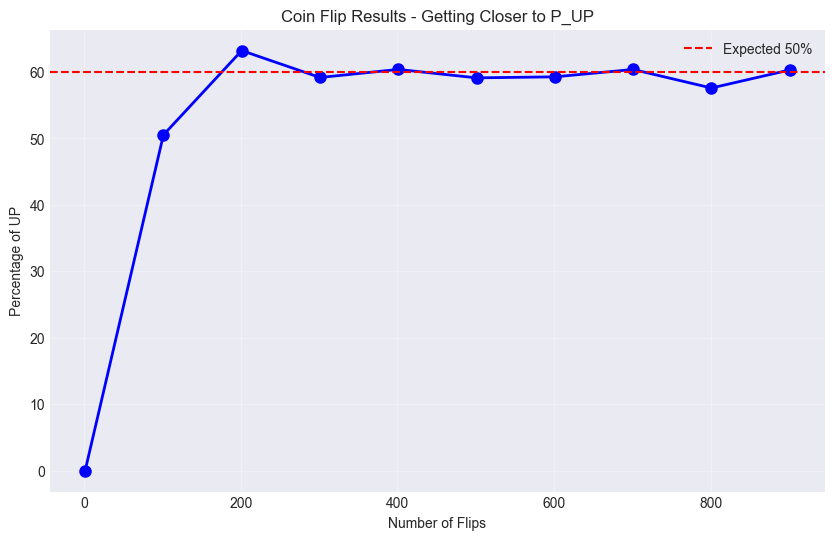

In [25]:
flip_many_coins(10,p_up)
visualize_coin_flips(p_up)

In [35]:
print(f"\nTheoretical P(Exactly 6): {p1:.4f} ({p1 * 100:.2f}%)")
print(f"Theoretical P(Atleast 8): {p3:.4f} ({p3 * 100:.2f}%)")


Theoretical P(Exactly 6): 0.2508 (25.08%)
Theoretical P(Atleast 8): 0.1673 (16.73%)


### **RESULTS**
The theoretical values of probabilities are:
- P(Exactly 6 UPs): 0.2508
- P(Atleast 8 UPs): 0.1673

The calulated values of probabilies using 10 coin flip simulation for 1000 times using P(UP)=0.6:
- P(Exactly 6 UPs): 0.2390
- P(Atleast 8 UPs): 0.1720

This shows that the coin flip scenario almost mimics the theoretical probabilities and can probably reach even the exact values or even nearer to the exact values if the simulation runs for a longer duration. This is proven below. Instead of 1,000 simulations, I ran 10,000 simulations,

Out of 10,000 simulations of 10 flips:
- Probability of exactly 6 UPs: 0.2507
- Probability of at least 8 UPs: 0.1729

These new value of probability of exactly 6 UPs is closer to the theoretical value.

In [27]:
def flip_coin(P_UP):
    return 'UP' if random.random() < P_UP else 'DOWN'

def flip_many_coins(num_flips,P_UP):
    """Flip coin many times and count results"""
    results = []
    for i in range(num_flips):
        results.append(flip_coin(P_UP))

    heads_count = results.count('UP')
    tails_count = results.count('DOWN')

    heads_percentage = (heads_count / num_flips) * 100

    print(f"\n{num_flips} coin flips:")
    print(f"UP: {heads_count} ({heads_percentage:.1f}%)")
    print(f"DOWN: {tails_count} ({100-heads_percentage:.1f}%)")

    return results

def visualize_coin_flips(P_UP):
    flip_counts = list(range(1,10001,1000))
    heads_percentages = []
    exact_6 = 0
    atleast_8 = 0

    for count in flip_counts:
        results = []
        for i in range(count):
            results.append(flip_coin(P_UP))
        heads_pct = (results.count('UP') / count) * 100
        heads_percentages.append(heads_pct)
        print(f"{count} flips: {heads_pct:.1f}% UP")

    for i in range(10000):
      results = []
      for i in range(10):
          results.append(flip_coin(P_UP))
      total_up = results.count('UP')

      if total_up == 6:
          exact_6 += 1
      if total_up >= 8:
          atleast_8 += 1

    prob_6 = exact_6 / 10000
    prob_8plus = atleast_8 /10000
    print(f"\n\nOut of 10,000 simulations of 10 flips:")
    print(f"- Probability of exactly 6 UPs: {prob_6:.4f}")
    print(f"- Probability of at least 8 UPs: {prob_8plus:.4f}")

    # Plot it
    plt.figure(figsize=(10, 6))
    plt.plot(flip_counts, heads_percentages, 'bo-', linewidth=2, markersize=8)
    plt.axhline(y=p_up*100, color='red', linestyle='--', label='Expected 50%')
    plt.xlabel('Number of Flips')
    plt.ylabel('Percentage of UP')
    plt.title('Coin Flip Results - Getting Closer to P_UP')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()


10 coin flips:
UP: 6 (60.0%)
DOWN: 4 (40.0%)
1 flips: 0.0% UP
1001 flips: 60.0% UP
2001 flips: 60.0% UP
3001 flips: 58.9% UP
4001 flips: 60.5% UP
5001 flips: 60.5% UP
6001 flips: 60.0% UP
7001 flips: 61.0% UP
8001 flips: 60.4% UP
9001 flips: 60.0% UP


Out of 10,000 simulations of 10 flips:
- Probability of exactly 6 UPs: 0.2559
- Probability of at least 8 UPs: 0.1663


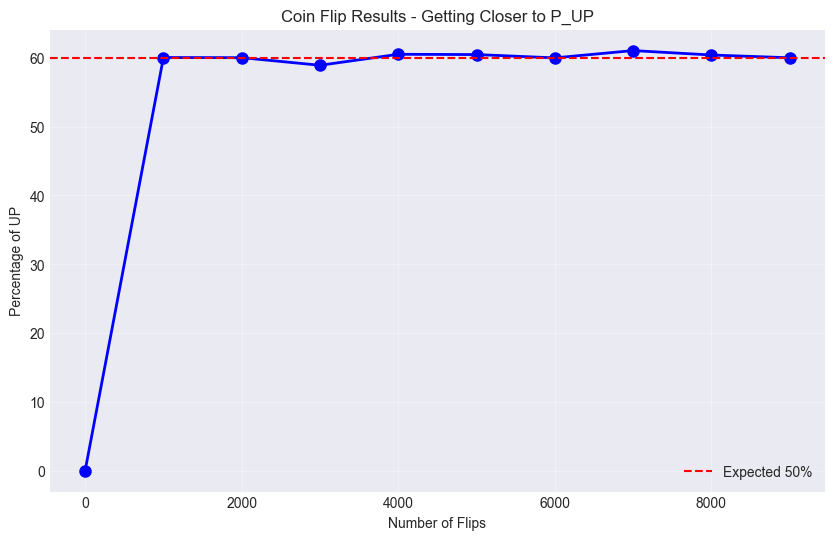

In [28]:
flip_many_coins(10,p_up)
visualize_coin_flips(p_up)

### Even with 6 Up Days Out of 10, You Can Still Lose Money

- You have 6 up days and 4 down days
- You start with an initial investment P : Principal

The compound interest formula for the amount is:<br>
$ \text {Amount} =P\times (1+r/n)^{nt} $ where n is the number of compounding periods

The compound interest formula for a sequence of returns is:<br>
$\text{Amount} = P \times (1 + r_u)^{n_u} \times (1 + r_d)^{n_d}$

Where:
- $ r_u   = \text {average return \% on up days} $
- $ r_d  = \text {average return \% on down days} $
- $ n_u  = \text {number of up days} = 6 $
- $ n_d  = \text {number of down days} = 4 $

Therefore, the returns can be calculated as (Amount-Principal)/Principal.

$ \text{Return} = (1 + r_u)^{n_u} \times (1 + r_d)^{n_d} -1 $

In [31]:
ru=data[data['Direction']=='UP']['Daily Return'].mean()
rd = data[data['Direction'] == 'DOWN']['Daily Return'].mean()
amount = (1 + ru) ** 6 * (1 + rd) ** 4
total_return = amount - 1
print(f"Avg UP return: {ru:.4f}")
print(f"Avg DOWN return: {rd:.4f}")
print(f"Net return over 10 days (6 UP, 4 DOWN): {total_return:.4%}")


Avg UP return: 0.0090
Avg DOWN return: -0.0079
Net return over 10 days (6 UP, 4 DOWN): 2.2174%


Although here it can be seen that the net return is positive, so money would be gained in this scenario. It is possible to lose money if the Average DOWN return was even slightly greater. Therefore, a high win rate does not guarentee profitability.

### Part 3:  Someone offers you this bet:
 • Win 100 when your stock goes up

 • Lose 150 when your stock goes down

 Would you take it?

 Based on TCS stock data from 2023:
- P(UP) ≈ 0.51
- Value Gained/Lost (approximate) =   $ 0.51 \times 100 + 0.49 \times (-150) = 51 - 73.5 = - \text{₹} 22.5 $
- That means, **on average, I would lose ₹22.5 per trade**.

 Even without seeing the expected value per trade or the total number of up or down days, it would be a risk to take this bet. The main reason that I thought it would be risky is because stock prices are usually very volatile. Though with a lot of tools these days, they can be predicted to some extent, it would still be risky if the stock price goes down. There is a probability that I could have been winning money rather than losing but after the calulation using the 2023 data, it seems like a losing bet if I keep on losing 21.42 on each trade

In [32]:
gain = 100
loss = -150

expected_value = P_UP * gain + (1-P_UP) * loss
print(f"Exact value per trade (no approximation): {expected_value}")


Exact value per trade (no approximation): -21.428571428571438


# Expectations

I am really excited to be a part of this project. My main expectation is to learn more about the technical and conceptual/probabilistic interpretations of strategies in finance.

I am pleased with the allotment. The foundation of this project aligns with the things I was already interested in and would like to pursue further.

The buzzword that caught my attention was "Bayesian Ranking". The incorporation of probability and statistics in the evaluation of financial strategies seemed to me as an interesting idea and I'm eager to learn more about it.
